In [1]:
import numpy as np
import pandas as pd

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
queen_train_path = "../../feature_extraction/MFCCs_80_features/train/train_queen.npy"
queenless_train_path = "../../feature_extraction/MFCCs_80_features/train/train_queenless.npy"
queen_test_path = "../../feature_extraction/MFCCs_80_features/test/train_queen.npy"
queenless_test_path = "../../feature_extraction/MFCCs_80_features/test/train_queenless.npy"
queen_val_path = "../../feature_extraction/MFCCs_80_features/val/train_queen.npy"
queenless_val_path = "../../feature_extraction/MFCCs_80_features/val/train_queenless.npy"

In [3]:
queen_train = np.load(queen_train_path)
queenless_train = np.load(queenless_train_path)
queen_test = np.load(queen_test_path)
queenless_test = np.load(queenless_test_path)
queen_val = np.load(queen_val_path)
queenless_val = np.load(queenless_val_path)


In [4]:
train_label = pd.DataFrame(np.hstack([[0]*7000, [1]*7000]).T, columns=['labels'])


In [5]:
train_data = pd.DataFrame(np.vstack([queen_train, queenless_train]))



In [6]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-531.931335,136.621933,45.603500,19.686640,6.475194,6.768497,-0.932306,6.658151,3.660365,2.098238,...,3.410441,3.068254,3.461446,2.733752,2.617498,2.545141,3.265490,2.939814,3.251054,2.363111
1,-536.993347,138.456238,34.898472,20.860229,4.066461,3.119111,-2.870780,0.477826,3.070781,0.220865,...,3.271066,3.057924,2.934288,2.283246,2.528649,3.761013,3.405852,3.222660,2.804340,2.501446
2,-525.730591,136.192719,36.625347,23.067327,0.258045,4.746896,-0.178224,2.476325,7.398917,3.634185,...,2.569722,2.521067,2.660564,3.227906,2.621328,2.251341,2.990477,3.052036,2.337557,3.078192
3,-540.449829,139.705780,29.665409,21.128056,3.132750,0.994988,0.255035,-0.820775,1.864982,0.350622,...,3.424932,2.889518,2.459073,2.296302,2.437574,3.083648,2.754676,2.309684,2.791369,2.983374
4,-543.696594,144.002136,36.112610,24.168007,2.962288,3.031038,-5.003596,1.735093,2.667939,1.482007,...,2.344167,3.222942,2.953240,2.791287,2.718980,2.942434,2.700898,2.942176,2.915053,2.179448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-586.455139,137.282516,34.373566,17.421253,10.941988,4.078198,11.242457,5.941251,6.012725,8.022065,...,2.428052,2.559160,2.407419,3.277859,2.843850,2.667268,2.398551,2.329866,2.560516,2.335296
13996,-572.707092,143.127991,32.171494,18.097290,9.731588,5.532512,8.742662,3.005665,5.201865,7.527236,...,2.768167,2.137187,3.072467,2.713317,2.586028,3.205523,3.542013,2.731712,2.763573,2.462618
13997,-579.057922,134.726349,32.156475,19.218019,5.755665,3.477601,12.935046,6.404186,5.639282,6.843115,...,2.286288,3.401324,2.976722,2.437173,2.736468,2.637976,2.689160,2.406368,2.608299,2.571860
13998,-578.548889,141.396133,31.506187,20.068113,6.832242,3.192559,11.349093,4.352320,4.009240,5.281808,...,2.726443,2.538073,2.842417,2.398781,3.491852,2.933051,2.796699,2.359412,2.553164,2.986884


In [7]:
queenless_test.shape

(2000, 80)

In [8]:
test_label = pd.DataFrame(np.hstack([[0]*3000, [1]*3000]).T, columns=['labels'])
test_data = pd.DataFrame(np.vstack([queen_test, queen_val, queenless_test, queenless_val]))



In [9]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(train_data)

In [11]:
X_test_scaled = scaler.transform(test_data)

In [37]:
[int(x) for x in np.arange(2,train_data.shape[1]//2,step=2)]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

In [20]:
import time
from sklearn.model_selection import RandomizedSearchCV

t1 = time.time()
extra_trees_search={'n_estimators': [50, 100, 200, 300, 500, 1000],
                    'max_features': [int(x) for x in np.arange(2,train_data.shape[1]//2,step=2)], #max <= n/2 và lấy =n, interval 2
                    'min_samples_leaf':  [1, 3, 5, 7, 9, 11], # Lưu ý Spectral Contract
                    'min_samples_split': [1, 3, 5, 7, 9, 11],
                    }
base_model = ExtraTreesClassifier(random_state = 1337)
clf = RandomizedSearchCV(base_model, extra_trees_search, scoring='accuracy', n_iter=50, random_state=1337, verbose=3)
clf.fit(X_scaled, np.array(train_label).ravel())

clf.fit(X_scaled, np.array(train_label).ravel())
t2 = time.time()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.688 total time=  12.1s
[CV 2/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.831 total time=  10.9s
[CV 3/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.750 total time=  10.7s
[CV 4/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.841 total time=  10.8s
[CV 5/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.738 total time=  10.7s
[CV 1/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.683 total time=   0.3s
[CV 2/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.807 total time=   0.3s
[CV 3/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\t

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.688 total time=  10.1s
[CV 2/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.831 total time=  10.3s
[CV 3/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.750 total time=  10.3s
[CV 4/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.841 total time=  10.6s
[CV 5/5] END max_features=8, min_samples_leaf=9, min_samples_split=7, n_estimators=1000;, score=0.738 total time=  10.3s
[CV 1/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.683 total time=   0.3s
[CV 2/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.807 total time=   0.2s
[CV 3/5] END max_features=4, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0

C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\tunne\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\t

In [33]:
clf.best_estimator_

ExtraTreesClassifier(max_features=30, min_samples_split=5, n_estimators=200,
                     random_state=1337)

In [21]:
print(f"time elapsed: {t2-t1} seconds or {int((t2-t1)//60)} minutes and {int((t2-t1)-(t2-t1)//60*60)} seconds")

time elapsed: 2837.8979732990265 seconds or 47 minutes and 17 seconds


In [22]:
print(accuracy_score(test_label,clf.predict(X_test_scaled)))

0.9518333333333333


In [23]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, roc_auc_score, auc


In [24]:
print(classification_report(test_label,clf.predict(X_test_scaled), target_names=["Queen", "Queenless"]))

              precision    recall  f1-score   support

       Queen       0.94      0.96      0.95      3000
   Queenless       0.96      0.94      0.95      3000

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



In [25]:
roc_curve(test_label,clf.predict(X_test_scaled))

(array([0.   , 0.036, 1.   ]),
 array([0.        , 0.93966667, 1.        ]),
 array([inf,  1.,  0.]))

In [26]:
import matplotlib.pyplot as plt

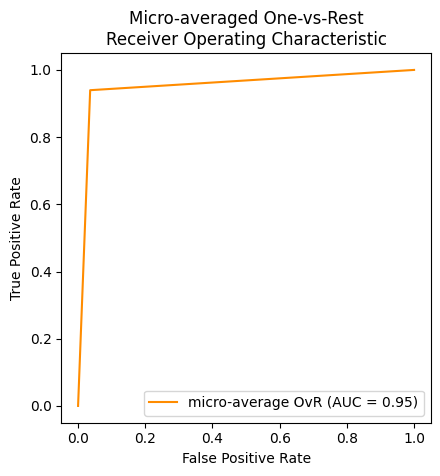

In [27]:
RocCurveDisplay.from_predictions(
    np.array(test_label.values).ravel(),
    np.array(clf.predict(X_test_scaled)).ravel(),
    name="micro-average OvR",
    color="darkorange",

)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

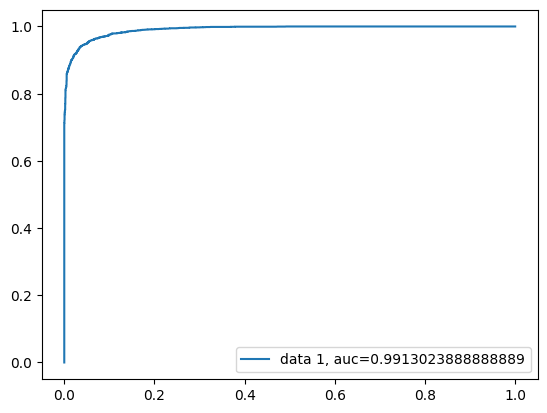

In [28]:
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(test_label,  y_pred_proba)
auc = roc_auc_score(test_label, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

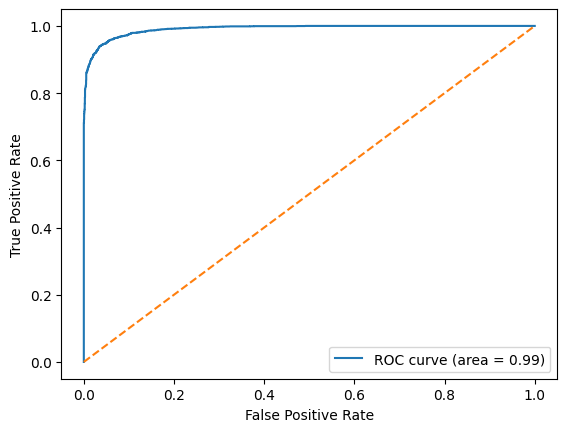

In [29]:
from sklearn.metrics import classification_report, roc_curve, RocCurveDisplay, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(test_label, clf.predict_proba(X_test_scaled)[:, 1])

auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = {0:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="dashed")
# plt.title("FFT 1D with XGBoost roc_curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("FFT 1D with XGBoost roc_curve.png")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix

<Axes: >

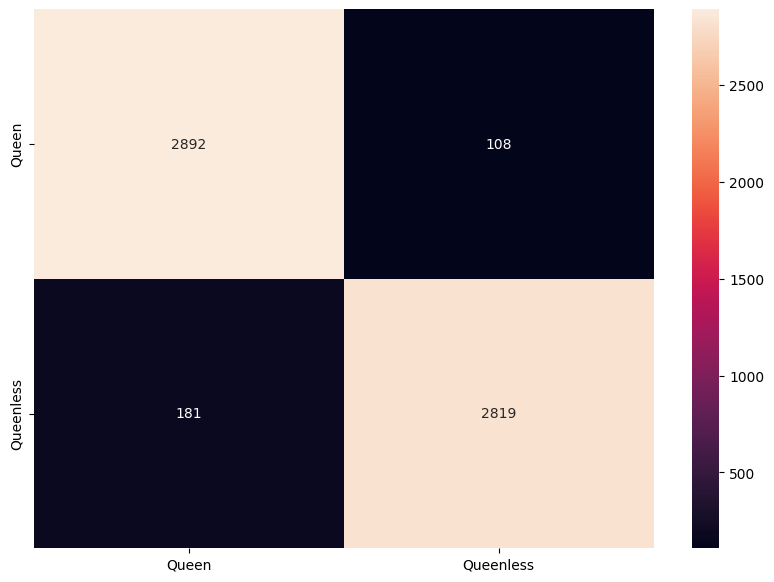

In [31]:
import seaborn as sns

cf_mat = confusion_matrix(test_label, clf.predict(X_test_scaled))
df_cm = pd.DataFrame(cf_mat, index = [i for i in ['Queen', 'Queenless']],
                  columns = [i for i in ['Queen', 'Queenless']])
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="", )


<Axes: >

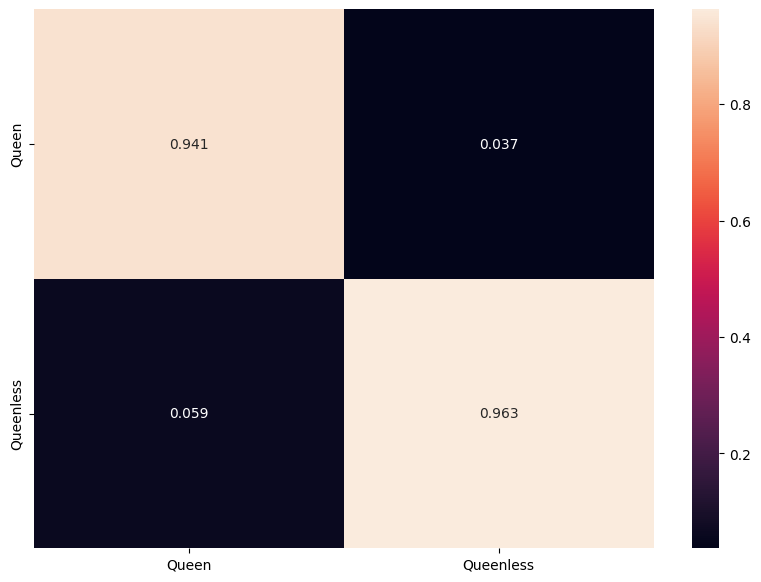

In [32]:
df_cm_normed = df_cm/df_cm.sum()
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_normed, annot=True, fmt=".3f", )